<a href="https://colab.research.google.com/github/yeonmi02/machine-learning-practice/blob/main/20250408_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 붓꽃 품종 분류
- logistic regression, SGDClassifier, Decision Tree Classifier 모델을 활용해서 분류
- Iris 데이터는 비교적 선형적인 데이터

## 데이터 로드 및 시각화

In [12]:
# sklearn이라는 라이브러리를 dataset의 하위로 불러온다
from sklearn import datasets

In [2]:
# 데이터 로드 및 분할
iris = datasets.load_iris()
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
c = [ ['r','g','b'][i] for i in y] # 각 레이블 값에 따라 색상을 지정하는 리스트

In [4]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
y[0]

np.int64(0)

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

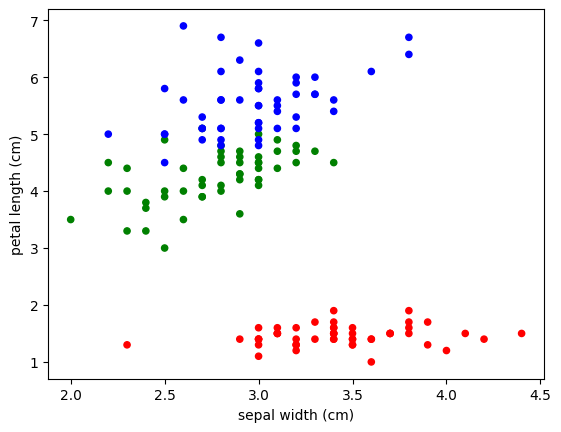

In [6]:
import pandas as pd

%matplotlib inline
df = pd.DataFrame(X,columns=iris.feature_names)
df.plot(x=1, y=2, c=c, kind='scatter')

## 데이터셋 분리 및 데이터 전처리

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터셋 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (LogisticRegression과 SGDClassifier에 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 모델 학습

In [9]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#모델 정의 및 학습
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# SGD Classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_scaled, y_train)
sgd_pred = sgd_clf.predict(X_test_scaled)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)

In [10]:
# 결과 비교
log_reg_acc = accuracy_score(y_test, log_reg_pred)
sgd_acc = accuracy_score(y_test, sgd_pred)
tree_acc = accuracy_score(y_test, tree_pred)

print("Logistic Regression Accuracy:", log_reg_acc)
print("SGD Classifier Accuracy:", sgd_acc)
print("Decision Tree Classifier Accuracy:", tree_acc)

Logistic Regression Accuracy: 0.9333333333333333
SGD Classifier Accuracy: 0.9333333333333333
Decision Tree Classifier Accuracy: 0.9333333333333333


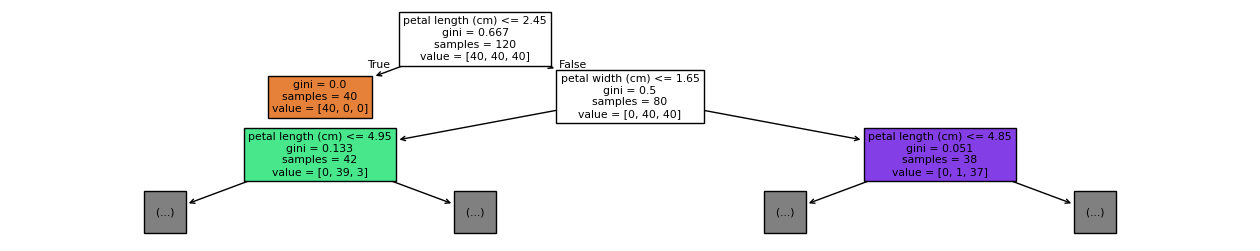

In [13]:
import matplotlib.pyplot as plot
from sklearn.tree import plot_tree
plot.figure(figsize=(16,3))
plot_tree(tree_clf, filled=True, max_depth=2, feature_names=iris.feature_names)
plot.show()